In [2]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# import the data set using dictionary
# we can definity use df.read_csv, but we don't want to import another document, so we can simple just write it down
# since the dataset is very small
antibotic_dict = {'Bacteria':['Aerobacter aerogenes','Brucella abortus','Brucella anthracis','Diplococcus pneumoniae','Escherichia coli','Klebsiella pneumoniae',' Mycobacterium tuberculosis','Proteus vulgaris','Pseudomonas aeruginosa','Salmonella (Eberthella) typhosa','Salmonella schottmuelleri','Staphylococcus albus','Staphylococcus aureus','Streptococcus fecalis','Streptococcus hemolyticus','Streptococcus viridans'],
                 'Penicilin':[870.0,1.0,0.001,0.005,100.0,850.0,800.0,3.0,850.0,1.0,10.0,0.007,0.03,1.0,0.001,0.005],
                 'Streptomycin':[1.0,2.0,0.01,11.0,0.4,1.2,5.0,0.1,2.0,0.4,0.8,0.1,0.03,1.0,14.0,10.0],
                 'Neomycin':[1.6,0.02,0.007,10.0,0.1,1.0,2.0,0.1,0.4,0.008,0.09,0.001,0.001,0.1,10.0,40.0],
                 'Gram_Staining':['-','-','+','+','-','-','-','-','-','-','-','+','+','+','+','+']}

# transfer the dictionary to pandas dataFrame
antibiotic = pd.DataFrame(antibotic_dict)
# print and see the dataSet
print(antibiotic)

                           Bacteria  Penicilin  Streptomycin  Neomycin  \
0              Aerobacter aerogenes    870.000          1.00     1.600   
1                  Brucella abortus      1.000          2.00     0.020   
2                Brucella anthracis      0.001          0.01     0.007   
3            Diplococcus pneumoniae      0.005         11.00    10.000   
4                  Escherichia coli    100.000          0.40     0.100   
5             Klebsiella pneumoniae    850.000          1.20     1.000   
6        Mycobacterium tuberculosis    800.000          5.00     2.000   
7                  Proteus vulgaris      3.000          0.10     0.100   
8            Pseudomonas aeruginosa    850.000          2.00     0.400   
9   Salmonella (Eberthella) typhosa      1.000          0.40     0.008   
10        Salmonella schottmuelleri     10.000          0.80     0.090   
11             Staphylococcus albus      0.007          0.10     0.001   
12            Staphylococcus aureus   

In [48]:
# The dataset you see above is a wide format, which is easy for human to read, but hard for computer to manipulate
# We use df.melt funtion, let 'Bacteria' and 'Gram_Staining' columns to be fix, change to a vertical format
vertical_antibiotic = antibiotic.melt(id_vars=['Bacteria','Gram_Staining']).sort_values(['Gram_Staining','Bacteria'])
print(vertical_antibiotic)

                           Bacteria Gram_Staining      variable    value
2                Brucella anthracis             +     Penicilin    0.001
18               Brucella anthracis             +  Streptomycin    0.010
34               Brucella anthracis             +      Neomycin    0.007
3            Diplococcus pneumoniae             +     Penicilin    0.005
19           Diplococcus pneumoniae             +  Streptomycin   11.000
35           Diplococcus pneumoniae             +      Neomycin   10.000
11             Staphylococcus albus             +     Penicilin    0.007
27             Staphylococcus albus             +  Streptomycin    0.100
43             Staphylococcus albus             +      Neomycin    0.001
12            Staphylococcus aureus             +     Penicilin    0.030
28            Staphylococcus aureus             +  Streptomycin    0.030
44            Staphylococcus aureus             +      Neomycin    0.001
13            Streptococcus fecalis             +  

<AxesSubplot:>

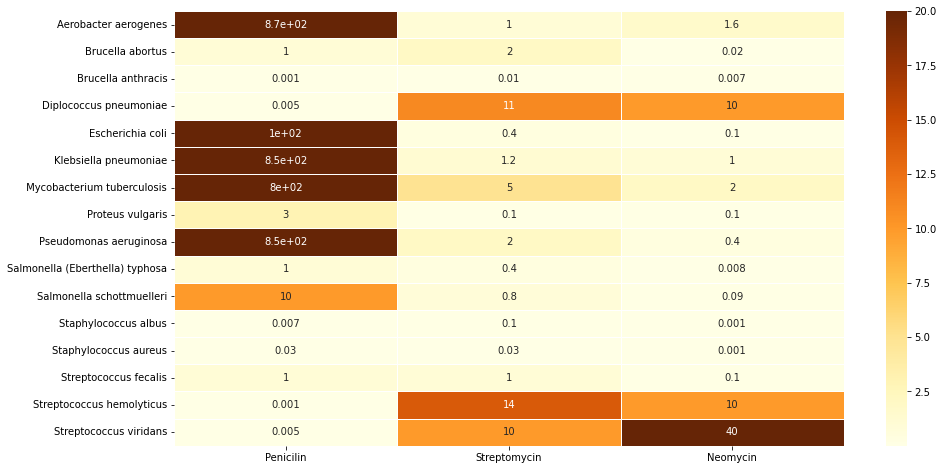

In [49]:
# Heatmap, without indicate grain_staining. It is clear that Pencillin is not the best one, but the different
# other two are hard to tell
# we set the vmin and vmax range and color map in order to see the different more clearly
min_antibiotic = antibiotic[['Penicilin','Streptomycin','Neomycin']]
plt.figure(figsize=(15,8))
sns.heatmap(min_antibiotic,cmap='YlOrBr',yticklabels=antibiotic['Bacteria'],vmin= 0.001,vmax=20,annot=True,
           linecolor='white',linewidths=0.5)

In [50]:
mean_antibiotic = vertical_antibiotic.groupby(['Gram_Staining','variable']).agg(np.mean)
print(mean_antibiotic.shape)
print(mean_antibiotic)

(6, 1)
                                 value
Gram_Staining variable                
+             Neomycin        8.587000
              Penicilin       0.149857
              Streptomycin    5.162857
-             Neomycin        0.590889
              Penicilin     387.222222
              Streptomycin    1.433333


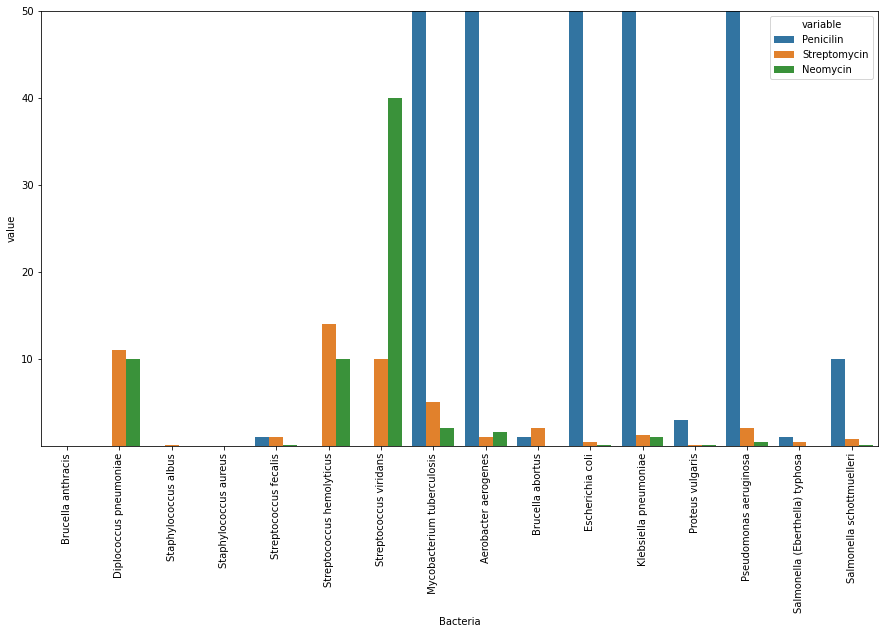

In [55]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Bacteria', y='value', hue='variable',ci=None, data=vertical_antibiotic)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylim = (0.001, 50))
fig.suptitle('MIC')
plt.show()

[(0.001, 50.0)]

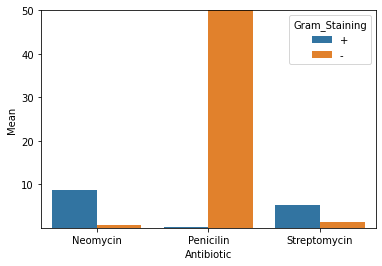

In [60]:
mean_a_dict = {
    'Gram_Staining':['+','+','+','-','-','-'],
    'Antibiotic':['Neomycin','Penicilin','Streptomycin','Neomycin','Penicilin','Streptomycin'],
    'Mean':[8.587000,0.149857,5.162857,0.590889,387.222222,1.433333]
}
mean_a = pd.DataFrame(mean_a_dict)
ax = sns.barplot(x='Antibiotic',y='Mean',hue='Gram_Staining',data=mean_a)
ax.set(ylim=(0.001,50))